In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
purchase_behaviour=pd.read_csv("QVI_purchase_behaviour.csv")
transactional_data=pd.read_csv("QVI_transaction_data.csv")

In [6]:
purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [9]:
purchase_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [11]:
purchase_behaviour['PREMIUM_CUSTOMER'].value_counts()

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

In [15]:
transactional_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [17]:
transactional_data['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [19]:
transactional_data['BRAND']=transactional_data['PROD_NAME'].str.split().str.get(0)
transactional_data['BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'Woolworths', 'French', 'RRD', 'Tostitos',
       'Cheetos', 'Snbts', 'Sunbites'], dtype=object)

In [21]:
transactional_data['BRAND']=transactional_data['BRAND'].replace({"Dorito":"Doritos","Infzns":"Infuzions","Smith":"Smiths","RRD":"Red","Snbts":"Sunbites"})

In [23]:
transactional_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [25]:
transactional_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
 8   BRAND           264836 non-null  object 
dtypes: float64(1), int64(6), object(2)
memory usage: 18.2+ MB


In [27]:
transactional_data['DATE'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(transactional_data['DATE'], unit='D')

In [29]:
transactional_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
 8   BRAND           264836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 18.2+ MB


In [31]:
transactional_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle


In [33]:
transactional_data['WEIGHT']=transactional_data['PROD_NAME'].str[-4:]
transactional_data['WEIGHT'].unique()

array(['175g', '170g', '150g', '300g', '330g', '210g', '210G', '270g',
       '220g', '125g', '110g', '134g', '150G', '175G', '380g', '180g',
       '165g', 'Salt', '250g', '200g', '160g', '190g', ' 90g', ' 70g'],
      dtype=object)

In [35]:
mask=transactional_data['WEIGHT']=='Salt'
transactional_data[mask]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,WEIGHT
65,2019-05-20,83,83008,82099,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,Salt
153,2019-05-17,208,208139,206906,63,Kettle 135g Swt Pot Sea Salt,1,4.2,Kettle,Salt
174,2018-08-20,237,237227,241132,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,Salt
177,2019-05-17,243,243070,246706,63,Kettle 135g Swt Pot Sea Salt,1,4.2,Kettle,Salt
348,2018-10-26,7,7077,6604,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,Salt
...,...,...,...,...,...,...,...,...,...,...
264564,2018-10-08,260,260240,259480,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,Salt
264574,2019-06-12,261,261035,259860,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,Salt
264725,2018-07-20,266,266413,264246,63,Kettle 135g Swt Pot Sea Salt,1,4.2,Kettle,Salt
264767,2019-06-08,269,269133,265839,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,Salt


In [37]:
transactional_data['WEIGHT']=transactional_data['WEIGHT'].replace({"Salt":'135g','210G':'210g','150G':'150g',"175G":"175g"})
transactional_data['WEIGHT'].unique()

array(['175g', '170g', '150g', '300g', '330g', '210g', '270g', '220g',
       '125g', '110g', '134g', '380g', '180g', '165g', '135g', '250g',
       '200g', '160g', '190g', ' 90g', ' 70g'], dtype=object)

In [39]:
#creating PACK SIZE
transactional_data['PACK_SIZE'] = transactional_data['WEIGHT'].str.replace('g', '').astype(float)

In [41]:
transactional_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
BRAND             0
WEIGHT            0
PACK_SIZE         0
dtype: int64

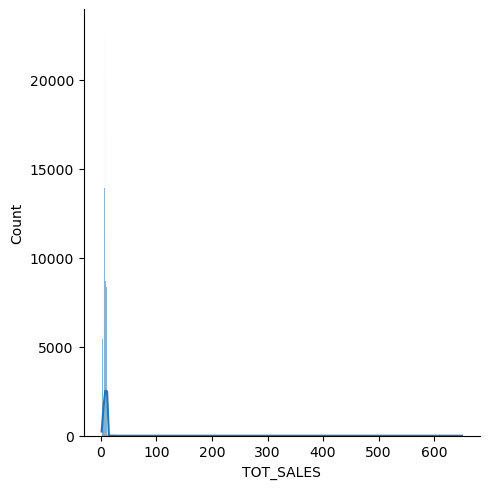

In [43]:
sns.displot(transactional_data.TOT_SALES,kde=True)

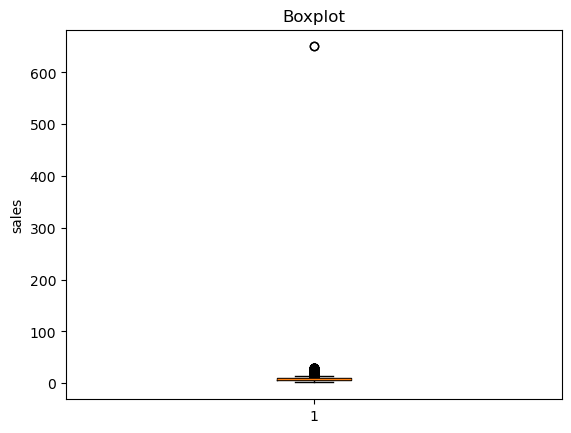

In [44]:
plt.boxplot(transactional_data['TOT_SALES'])
plt.title("Boxplot")
plt.ylabel("sales")
plt.show()

In [47]:
Q1 = transactional_data['TOT_SALES'].quantile(0.25)
Q3 = transactional_data['TOT_SALES'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = transactional_data[(transactional_data['TOT_SALES'] < lower_bound) |
                              (transactional_data['TOT_SALES'] > upper_bound)]

print(outliers[['LYLTY_CARD_NBR','TOT_SALES']])

        LYLTY_CARD_NBR  TOT_SALES
3                 2373       15.0
11                8294       23.0
56               74336       15.5
72               96203       28.5
100             130108       19.0
...                ...        ...
258715          194381       21.6
258721          200248       18.4
258726          203253       16.5
258729          208205       15.0
258788          264149       18.5

[578 rows x 2 columns]


In [49]:
clean_data = transactional_data[(transactional_data['TOT_SALES'] >= lower_bound) & 
                                 (transactional_data['TOT_SALES'] <= upper_bound)]

<Axes: ylabel='TOT_SALES'>

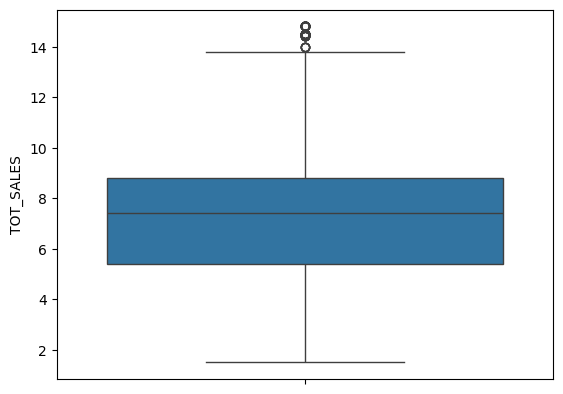

In [51]:
sns.boxplot(clean_data['TOT_SALES'])

In [53]:
merged_df=pd.merge(purchase_behaviour,clean_data,on="LYLTY_CARD_NBR", how="inner")
merged_df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,WEIGHT,PACK_SIZE
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175g,175.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,Red,150g,150.0
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,Grain,210g,210.0
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,Natural,175g,175.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,WW,160g,160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264253,2370701,YOUNG FAMILIES,Mainstream,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,Grain,210g,210.0
264254,2370751,YOUNG FAMILIES,Premium,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,Kettle,150g,150.0
264255,2370961,OLDER FAMILIES,Budget,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,Tyrrells,165g,165.0
264256,2370961,OLDER FAMILIES,Budget,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,Old,300g,300.0


In [55]:
#Total Spend per Customer
TOTAL_SPEND=merged_df.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum()
TOTAL_SPEND

LYLTY_CARD_NBR
1000        6.0
1002        2.7
1003        6.6
1004        1.9
1005        2.8
           ... 
2370651    13.0
2370701     7.2
2370751     9.2
2370961    18.6
2373711    11.4
Name: TOT_SALES, Length: 72588, dtype: float64

In [57]:
#Total Sales per Product
PRDT_SALES=merged_df.groupby('PROD_NAME')['TOT_SALES'].sum()
PRDT_SALES

PROD_NAME
Burger Rings 220g                         6831.0
CCs Nacho Cheese    175g                  5961.9
CCs Original 175g                         6048.0
CCs Tasty Cheese    175g                  6069.0
Cheetos Chs & Bacon Balls 190g            9226.8
                                           ...  
WW Sour Cream &OnionStacked Chips 160g    5323.8
WW Supreme Cheese   Corn Chips 200g       5390.3
Woolworths Cheese   Rings 190g            5169.6
Woolworths Medium   Salsa 300g            4050.0
Woolworths Mild     Salsa 300g            4234.5
Name: TOT_SALES, Length: 114, dtype: float64

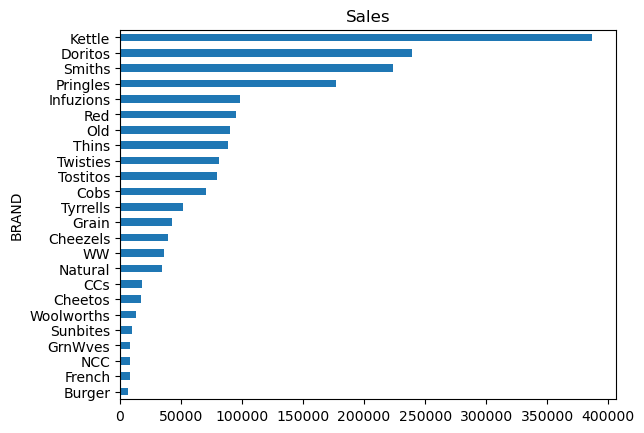

In [59]:
# Brandwise sales
Brandwise_Sales=merged_df.groupby('BRAND')['TOT_SALES'].sum()
Brandwise_Sales.sort_values().plot(kind="barh")
plt.title("Sales")
plt.show()

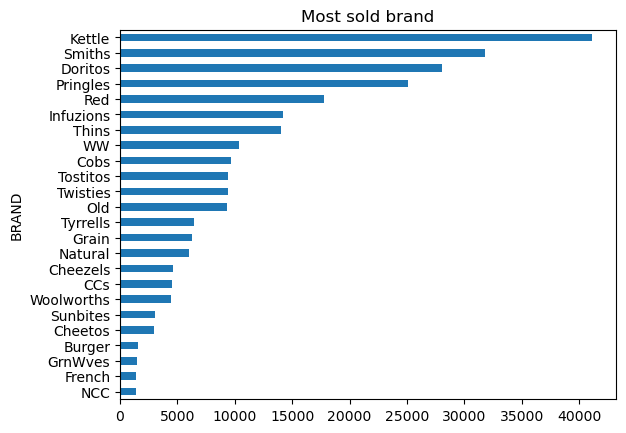

In [61]:
# POPULARITY OF BRANDS( by no of transactions)
Brand_Sold=merged_df.groupby('BRAND')['TXN_ID'].count()
Brand_Sold.sort_values().plot(kind="barh")
plt.title("Most sold brand")
plt.show()

In [63]:
merged_df['WEIGHT'].sort_values().unique()

array([' 70g', ' 90g', '110g', '125g', '134g', '135g', '150g', '160g',
       '165g', '170g', '175g', '180g', '190g', '200g', '210g', '220g',
       '250g', '270g', '300g', '330g', '380g'], dtype=object)

In [65]:
#creating custom category of chip bag sizes (<100:extrasmall,100-199:small,200-299:medium,300>=large)
weight_category_map={' 70g':"Extra Small",
                     ' 90g':"Extra Small",
                     '110g':"Small",
                     '125g':"Small", 
                     '134g':"Small", 
                     '135g':"Small",
                     '150g':"Small", 
                     '160g':"Small",
                     '165g':"Small",
                     '170g':"Small",
                     '175g':"Small",
                     '180g':"Small",
                     '190g':"Small",
                     '200g':"Medium",
                     '210g':"Medium",
                     '220g':"Medium",
                     '250g':"Medium",
                     '270g':"Medium",
                     '300g':"Large",
                     '330g':"Large",
                     '380g':"Large",
                    "nan":np.nan
                    }

#creating a new column "weight_category" by mapping these values
merged_df['BAG_SIZE']=merged_df['WEIGHT'].map(weight_category_map)

In [67]:
merged_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,WEIGHT,PACK_SIZE,BAG_SIZE
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175g,175.0,Small
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,Red,150g,150.0,Small
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,Grain,210g,210.0,Medium
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,Natural,175g,175.0,Small
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,WW,160g,160.0,Small


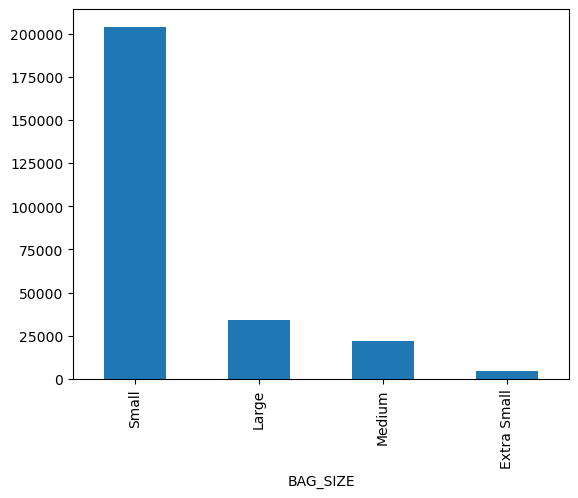

In [69]:
# BAG SIZE purchased most
merged_df['BAG_SIZE'].value_counts().plot(kind="bar")
plt.title='Sales of Each Bag Size' 

In [71]:
# most sold chips bag size is small , which implies 100-199 g bag sizes are sold the most
# and it has a significant sales compared to other pack sizes


In [73]:
merged_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,WEIGHT,PACK_SIZE,BAG_SIZE
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175g,175.0,Small
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,Red,150g,150.0,Small
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,Grain,210g,210.0,Medium
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,Natural,175g,175.0,Small
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,WW,160g,160.0,Small


In [75]:
#no of transactions per customer type
tr_by_cust_type=merged_df.groupby('PREMIUM_CUSTOMER')['TXN_ID'].count()
tr_by_cust_type

PREMIUM_CUSTOMER
Budget         92943
Mainstream    101770
Premium        69545
Name: TXN_ID, dtype: int64

In [77]:
#Largest customer type is mainstream

In [79]:
#lifestage and consumption quantity
#creating a column 'quantity consumed'

merged_df['QTY_CONSUMED']= merged_df['PROD_QTY']*merged_df['PACK_SIZE']
merged_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,WEIGHT,PACK_SIZE,BAG_SIZE,QTY_CONSUMED
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175g,175.0,Small,350.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,Red,150g,150.0,Small,150.0
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,Grain,210g,210.0,Medium,210.0
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,Natural,175g,175.0,Small,175.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,WW,160g,160.0,Small,160.0


In [81]:
#LIFESTAGE AND QUANTITY CONSUMED
qty_consumed=merged_df.groupby('LIFESTAGE')['QTY_CONSUMED'].sum()
qty_consumed.sort_values(ascending=False)

LIFESTAGE
OLDER SINGLES/COUPLES     18898632.0
OLDER FAMILIES            17119334.0
RETIREES                  17118718.0
YOUNG FAMILIES            15288140.0
YOUNG SINGLES/COUPLES     12160458.0
MIDAGE SINGLES/COUPLES     8669558.0
NEW FAMILIES               2323771.0
Name: QTY_CONSUMED, dtype: float64

In [83]:
# top 10 consumers
Spend=merged_df.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum()
Spend.sort_values(ascending=False).head(10)

LYLTY_CARD_NBR
230078    138.60
259009    127.20
162039    126.80
58361     124.80
94185     122.80
130090    122.65
179228    120.80
172032    120.10
199157    118.80
116181    117.60
Name: TOT_SALES, dtype: float64

In [85]:
# now we have top 10 consumers 
top_ten_customers=[230078,259009,162039,58361,94185,130090,179228,172032,199157,116181]


# filtering these customers
mask=merged_df['LYLTY_CARD_NBR'].isin(top_ten_customers)
top_df=merged_df[mask]


#year-month column
top_df['YEAR_MONTH'] = top_df['DATE'].dt.to_period('M')

C:\Users\sajeev\AppData\Local\Temp\ipykernel_34832\616945099.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_df['YEAR_MONTH'] = top_df['DATE'].dt.to_period('M')


In [87]:
top_df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,WEIGHT,PACK_SIZE,BAG_SIZE,QTY_CONSUMED,YEAR_MONTH
53189,58361,YOUNG FAMILIES,Budget,2018-08-10,58,54409,88,Kettle Honey Soy Chicken 175g,2,10.8,Kettle,175g,175.0,Small,350.0,2018-08
53190,58361,YOUNG FAMILIES,Budget,2018-10-01,58,54410,25,Pringles SourCream Onion 134g,2,7.4,Pringles,134g,134.0,Small,268.0,2018-10
53191,58361,YOUNG FAMILIES,Budget,2018-10-01,58,54410,50,Tostitos Lightly Salted 175g,2,8.8,Tostitos,175g,175.0,Small,350.0,2018-10
53192,58361,YOUNG FAMILIES,Budget,2018-10-13,58,54411,14,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.8,Smiths,380g,380.0,Large,760.0,2018-10
53193,58361,YOUNG FAMILIES,Budget,2018-10-31,58,54412,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,9.2,Kettle,150g,150.0,Small,300.0,2018-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251726,259009,OLDER SINGLES/COUPLES,Mainstream,2019-04-12,259,257465,84,GrnWves Plus Btroot & Chilli Jam 180g,2,6.2,GrnWves,180g,180.0,Small,360.0,2019-04
251727,259009,OLDER SINGLES/COUPLES,Mainstream,2019-04-25,259,257466,4,Dorito Corn Chp Supreme 380g,2,13.0,Doritos,380g,380.0,Large,760.0,2019-04
251728,259009,OLDER SINGLES/COUPLES,Mainstream,2019-04-25,259,257466,94,Burger Rings 220g,2,4.6,Burger,220g,220.0,Medium,440.0,2019-04
251729,259009,OLDER SINGLES/COUPLES,Mainstream,2019-04-26,259,257467,88,Kettle Honey Soy Chicken 175g,2,10.8,Kettle,175g,175.0,Small,350.0,2019-04


In [89]:
#avg monthly spend
monthly_spend = top_df.groupby(['LYLTY_CARD_NBR', 'YEAR_MONTH'])['TOT_SALES'].sum().reset_index()
monthly_spend


,LYLTY_CARD_NBR,YEAR_MONTH,TOT_SALES
0,58361,2018-08,10.8
1,58361,2018-10,37.2
2,58361,2018-11,6.6
3,58361,2018-12,6.6
4,58361,2019-01,7.4
...,...,...,...
85,259009,2018-12,15.4
86,259009,2019-02,8.8
87,259009,2019-03,10.2
88,259009,2019-04,34.6


In [101]:
# average of all those monthly spends
overall_avg_monthly_spend = monthly_spend['TOT_SALES'].mean()
overall_avg_monthly_spend

13.779444444444444

Largest customer type is Mainstream
OLDER SINGLES/COUPLES consumed most quantity of chips
top 10 customers usually spends 13.779 monthly on chips on an average
Most popular brands are: Kettle,Smiths,Doritos and Pringles
most sold chips bag size is small , which implies 100-199 g bag sizes are sold the most and it has a significant sales compared to other pack sizes

In [113]:
#saving
merged_df.to_csv('chips_final.csv')